<a href="https://colab.research.google.com/github/Swami-Siva-Rama-Raju/ML-Algorithms-Projects/blob/main/Fish_Species_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Libraies**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix , accuracy_score
from sklearn.preprocessing import StandardScaler,LabelEncoder
import warnings
warnings.filterwarnings('ignore')

**Loading Dataset**

In [2]:
fish_df=pd.read_csv('/content/drive/MyDrive/KNN/Fish.csv')

**Understanding Dataset**

In [3]:
fish_df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [4]:
fish_df.sample(10)

,Species,Weight,Length1,Length2,Length3,Height,Width
59,Whitefish,800.0,33.7,36.4,39.6,11.7612,6.5736
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
47,Roach,160.0,21.1,22.5,25.0,6.4000,3.8000
108,Perch,320.0,27.8,30.0,31.6,7.6156,4.7716
15,Bream,600.0,29.4,32.0,37.2,15.4380,5.5800
52,Roach,290.0,24.0,26.0,29.2,8.8768,4.4968
21,Bream,685.0,31.4,34.0,39.2,15.9936,5.3704
103,Perch,260.0,25.4,27.5,28.9,7.1672,4.3350
90,Perch,110.0,20.0,22.0,23.5,5.5225,3.9950
106,Perch,250.0,25.9,28.0,29.4,7.8204,4.2042


In [5]:
fish_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [6]:
fish_df.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [7]:
fish_df.columns

Index(['Species', 'Weight', 'Length1', 'Length2', 'Length3', 'Height',
       'Width'],
      dtype='object')

In [8]:
fish_df.dtypes

,0
Species,object
Weight,float64
Length1,float64
Length2,float64
Length3,float64
Height,float64
Width,float64


In [9]:
fish_df.shape

(159, 7)

**Data Preprocessing**

In [10]:
fish_df.isnull().sum()

,0
Species,0
Weight,0
Length1,0
Length2,0
Length3,0
Height,0
Width,0


In [11]:
fish_df.duplicated().sum()

0

In [12]:
fish_df['Species'].unique()

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [13]:
le=LabelEncoder()
fish_df['Species']=le.fit_transform(fish_df['Species'])

In [14]:
fish_df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,0,290.0,24.0,26.3,31.2,12.4800,4.3056
2,0,340.0,23.9,26.5,31.1,12.3778,4.6961
3,0,363.0,26.3,29.0,33.5,12.7300,4.4555
4,0,430.0,26.5,29.0,34.0,12.4440,5.1340


0.  Broom
1.  Parkki
2.  perch
3.  Pike
4.  Roach
5.  Smelt
6.  whitefish

**Data Visualization**

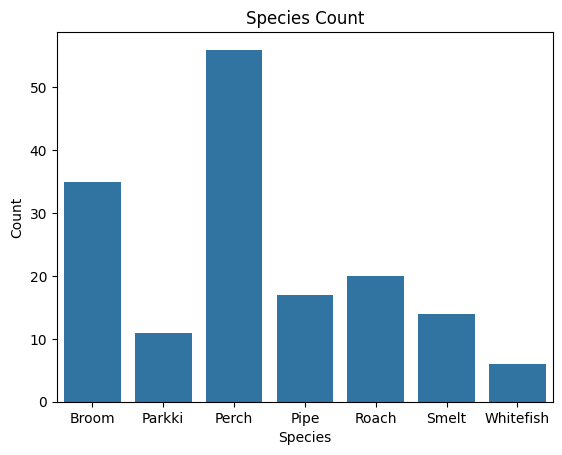

In [15]:
#countplot
sns.countplot(x='Species',data=fish_df)
plt.title('Species Count')
plt.xlabel('Species')
plt.ylabel('Count')
plt.xticks([0,1,2,3,4,5,6],['Broom','Parkki','Perch','Pipe','Roach','Smelt','Whitefish'])
plt.show()

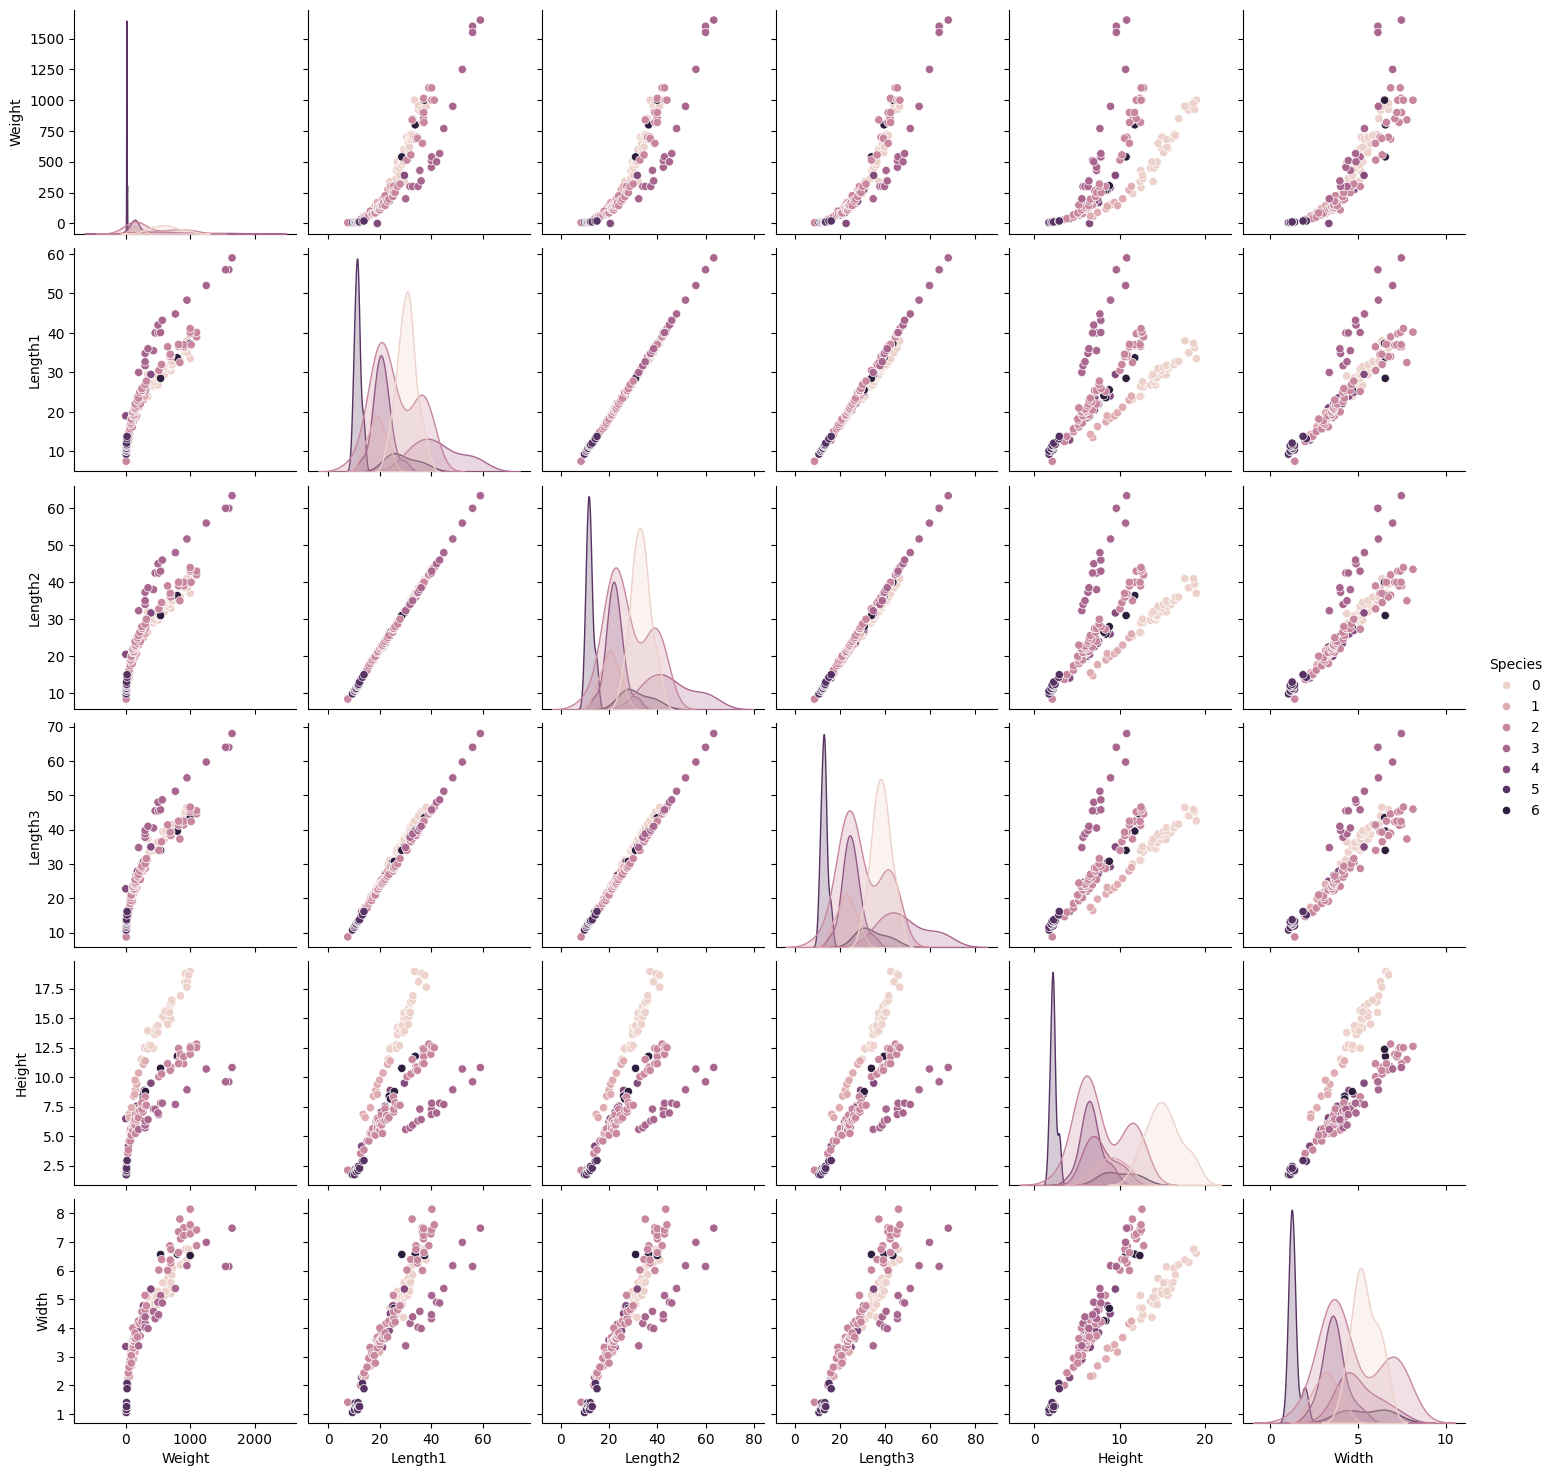

In [16]:
#pair plot
sns.pairplot(fish_df,hue='Species')
plt.show()

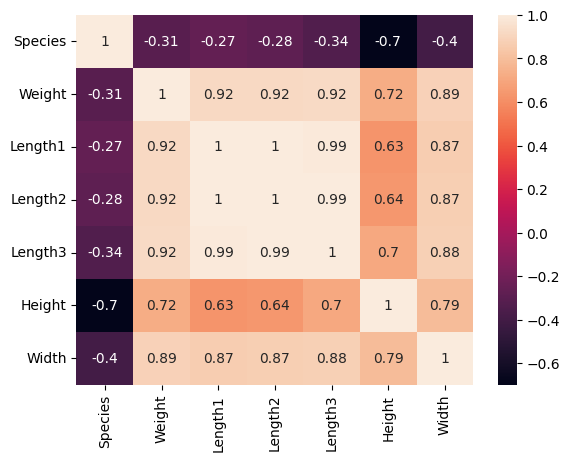

In [17]:
#heatmap for correaltion
sns.heatmap(fish_df.corr(),annot=True)
plt.show()

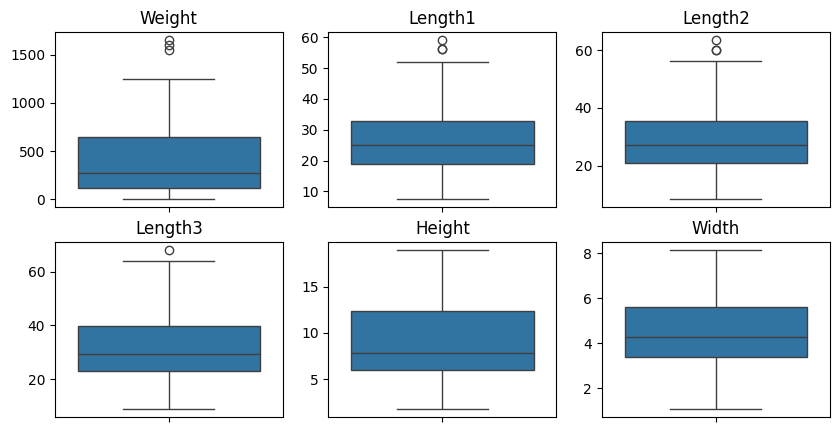

In [18]:
#Boxplot
plt.figure(figsize=(10,5))
for i in range(1,7):
  plt.subplot(2,3,i)
  sns.boxplot(fish_df.iloc[:,i])
  plt.title(fish_df.columns[i])
  plt.ylabel('')
plt.show()

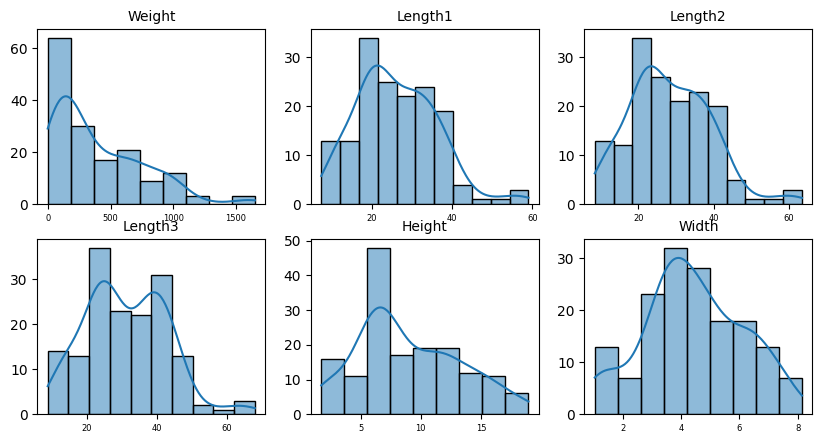

In [19]:
#histplot
plt.figure(figsize=(10,5))
for i in range(1,7):
  plt.subplot(2,3,i)
  sns.histplot(fish_df.iloc[:,i],kde=True)
  plt.xlabel('')
  plt.ylabel('')
  plt.xticks(fontsize=6)
  plt.title(fish_df.columns[i],fontsize=10)
plt.show()

**Model Building**

In [20]:
std=StandardScaler()
fish_df.iloc[:,1:7]=std.fit_transform(fish_df.iloc[:,1:7])

In [21]:
fish_df

,Species,Weight,Length1,Length2,Length3,Height,Width
0,0,-0.438072,-0.305789,-0.282303,-0.106020,0.596579,-0.236529
1,0,-0.303562,-0.225507,-0.198054,-0.002337,0.821261,-0.066579
2,0,-0.163448,-0.235542,-0.179332,-0.010977,0.797341,0.165793
3,0,-0.098995,0.005302,0.054694,0.196390,0.879771,0.022621
4,0,0.088759,0.025372,0.054694,0.239592,0.812835,0.426371
...,...,...,...,...,...,...,...
154,5,-1.082039,-1.479903,-1.517960,-1.540309,-1.610359,-1.799403
155,5,-1.078676,-1.459833,-1.499238,-1.531669,-1.530878,-1.873547
156,5,-1.082039,-1.419692,-1.443072,-1.505748,-1.566687,-1.881402
157,5,-1.061022,-1.309305,-1.321378,-1.384784,-1.427243,-1.398568


In [22]:
#Seperating dependent and independent features
X=fish_df.drop('Species',axis=1)
y=fish_df['Species']

In [23]:
#Train test split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [24]:
model_knn=KNeighborsClassifier(n_neighbors=5)

In [25]:
model_knn.fit(X_train,y_train)

KNeighborsClassifier()

In [26]:
#predict
y_pred=model_knn.predict(X_test)

In [27]:
#Classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         1
           2       0.73      0.89      0.80         9
           3       1.00      1.00      1.00         3
           4       0.50      1.00      0.67         1
           5       1.00      1.00      1.00         5
           6       0.00      0.00      0.00         3

    accuracy                           0.88        32
   macro avg       0.75      0.84      0.78        32
weighted avg       0.81      0.88      0.84        32



In [28]:
#accuracy
print("Accuracy is :",accuracy_score(y_test,y_pred))

Accuracy is : 0.875


In [29]:
input_data=(242,23,25,31,12,4)
input_data_as_numpy_array=np.asarray(input_data)
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)
prediction=model_knn.predict(input_data_reshaped)
print(prediction)

[3]


In [30]:
if prediction[0]==0:
  print('Broom')
elif prediction[0]==1:
  print('Parkki')
elif prediction[0]==2:
  print('Perch')
elif prediction[0]==3:
  print('Pipe')
elif prediction[0]==4:
  print('Roach')
elif prediction[0]==5:
  print('Smelt')
else:
  print('Whitefish')

Pipe
